# Introduction
State notebook purpose here

### Imports
Import libraries and write settings here.

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from IPython import get_ipython
ipython = get_ipython()

# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload

%autoreload 2

# Visualizations
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

import cufflinks as cf
cf.go_offline(connected=True)
cf.set_config_file(theme='white')

ImportError: 
The plotly.plotly module is deprecated,
please install the chart-studio package and use the
chart_studio.plotly module instead. 


# Analysis/Modeling
Do work here

# Results
Show graphs and stats here

# Conclusions and Next Steps
Summarize findings here

Если данных становится достаточно много, для их хранения используют базы данных (БД).

>База данных — это организованная структура для хранения, изменения и обработки взаимосвязанной информации

### ВИДЫ БАЗ ДАННЫХ

Базы данных можно разделить на два вида:

- Реляционные. В таких БД данные хранятся в виде связанных таблиц. В этом курсе мы сфокусируемся именно на реляционных БД.
- Нереляционные. Такие БД имеют специфическую структуру: например, данные хранятся в формате ключ-значение или в виде дерева.

[Дополнительно о базе данных](https://tproger.ru/translations/sql-nosql-database-models/)

### ХРАНЕНИЕ ДАННЫХ В БД

Данные в реляционных БД хранятся в виде таблиц. Каждая таблица обычно содержит данные, относящиеся к похожим объектам. У каждой таблицы есть название: оно соотносится с тем, какая информация хранится в таблице.

Таблицы в БД состоят из строк и столбцов. Каждый столбец имеет своё уникальное название, которое также отмечает вид хранимой в нём информации. В каждой строке хранится информация об одном объекте.

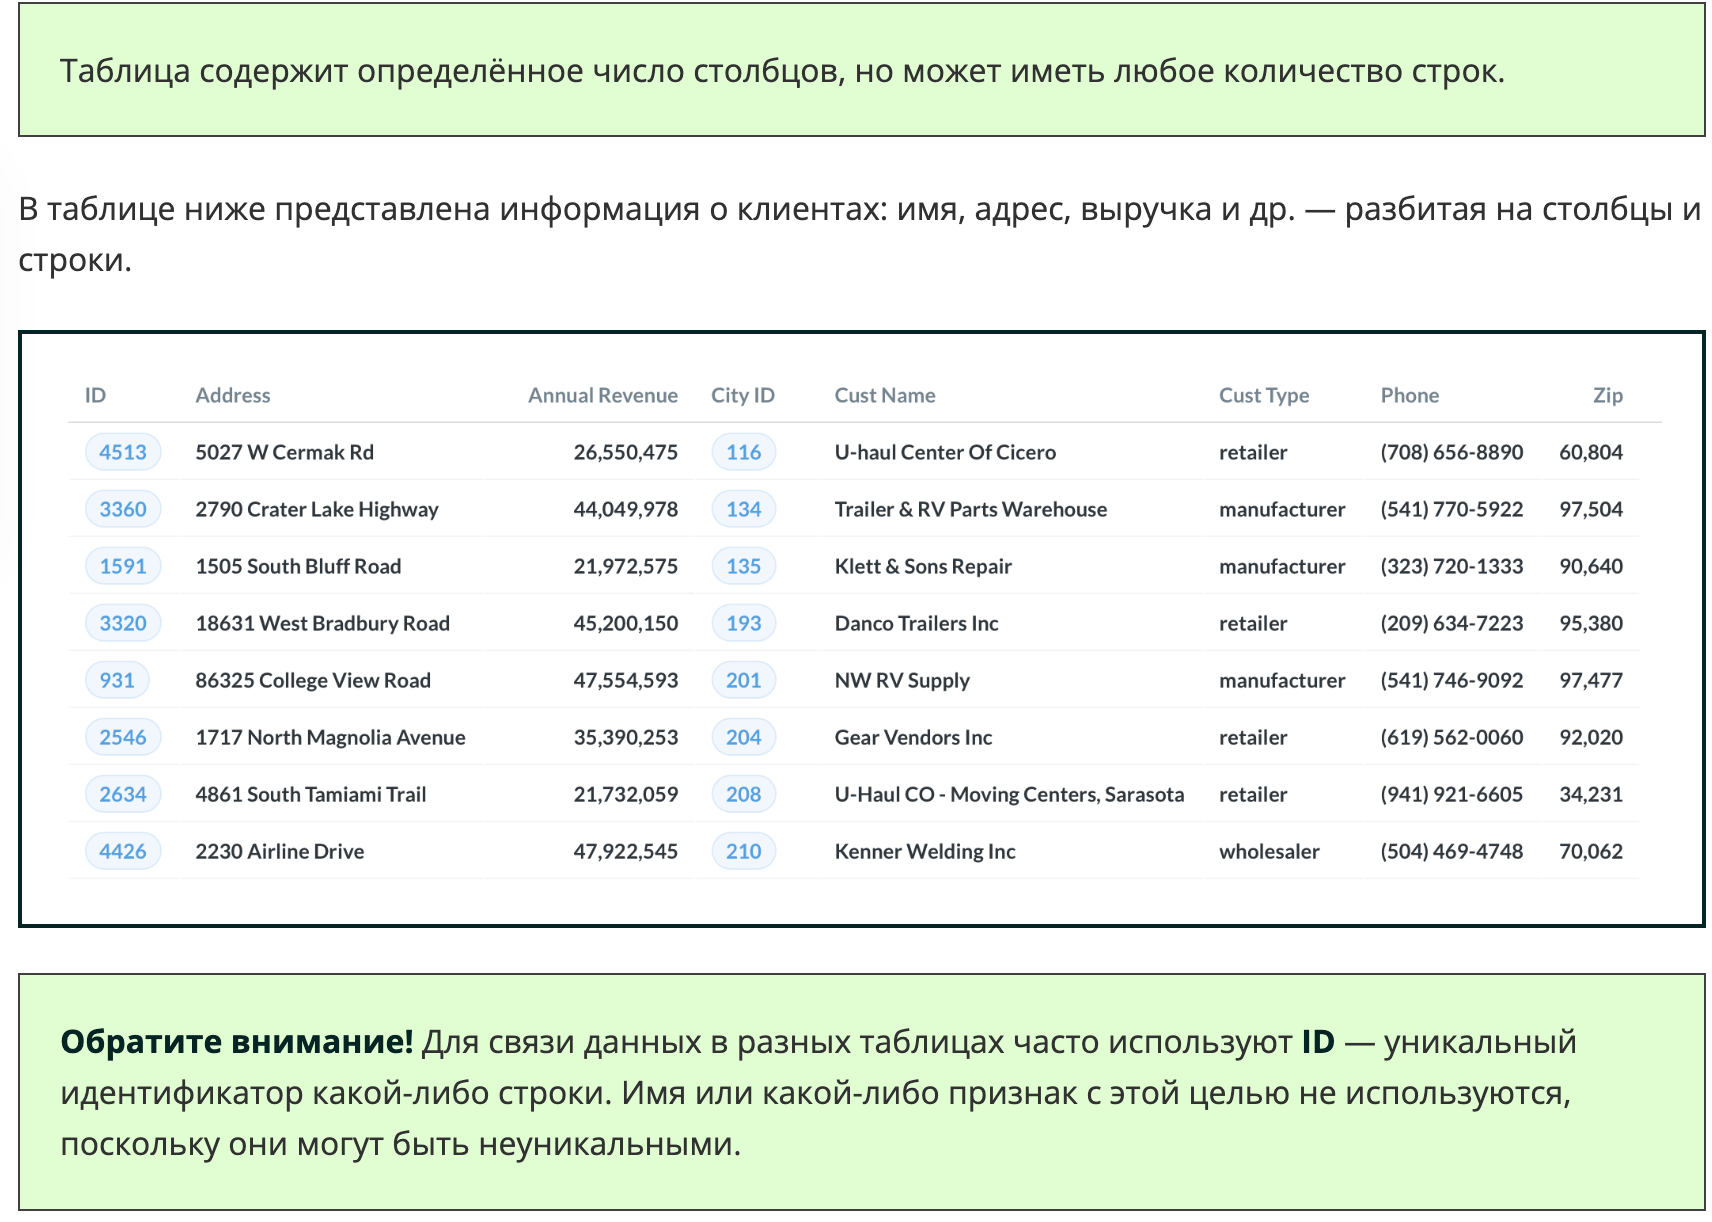

### СИСТЕМЫ УПРАВЛЕНИЯ БАЗАМИ ДАННЫХ

Данные мало хранить — с ними нужно работать: записывать, модифицировать и удалять. В этом помогает СУБД.

>Система управления базами данных, или СУБД (от англ. DataBase Management System, DBMS) — это комплекс программных средств, необходимых для создания структуры новой базы, её наполнения, редактирования содержимого и отображения информации.

Существует множество СУБД, наиболее распространённые из них — MySQL, PostgreSQL, Oracle, Microsoft SQL Server. Для очень большого объёма данных также используют ClickHouse, Hadoop и др.

>Мы будем использовать PostgreSQL 11 версии, документация - [англ.](https://www.postgresql.org/docs/11/index.html) и [русская](https://postgrespro.ru/docs/postgresql/11/index.html)

Для работы с данными, хранящимися в БД, используется специальный язык — SQL, который мы и будем изучать. Для работы с разными СУБД используются разные диалекты SQL.

# Что такое SQL?

>SQL-запрос представляет собой совокупность операторов, инструкций, вычисляемых функций.

### ВИДЫ ОПЕРАТОРОВ SQL

Операторы SQL делятся на:

- операторы определения данных (Data Definition Language, DDL) — с их помощью создаются и изменяются объекты в БД (сама БД, таблицы, функции, процедуры, пользователи и т. д.);
- операторы манипуляции данными (Data Manipulation Language, DML) — с их помощью проводятся манипуляции с данными в таблицах;
- операторы определения доступа к данным (Data Control Language, DCL) — с их помощью, как следует из названия, создаются и изменяются разрешения на определённые операции с объектами в БД;
- операторы управления транзакциями (Transaction Control Language, TCL) — с их помощью осуществляется комплекс определённых действий, причём так, что либо все эти действия выполняются успешно, либо ни одно из них не выполняется вообще.

>Мы будем изучать только DML-операторы (для манипуляций с данными), а конкретнее — оператор SELECT, который позволяет выбрать из БД интересующие нас данные.

# Что такое Metabase?

Для написания запросов к БД необходим специальный инструмент. Это может быть терминал в ОС, специализированная программа (например, одна из распространённых — DataGrip) или веб-сервис. Именно такой веб-сервис мы будем использовать.

>Metabase — это бесплатный и удобный инструмент для первичного анализа данных с возможностью передавать запросы.

>SELECT *
FROM sql.kinopoisk

В результате вы увидите всё содержимое таблицы.

РАЗБИРАЕМ ЗАПРОС

→ Оператор SELECT сообщает СУБД, что вы хотите извлечь из неё данные. SELECT лежит в основе любого SQL-запроса к БД.

→ FROM sql.kinopoisk сообщает, из какой таблицы извлекаются данные. Сначала указывается название схемы, в которой содержится таблица (в нашем случае — это sql), а после точки — название самой таблицы (kinopoisk).

→ Звёздочка * указывает, что вы хотите видеть все столбцы этой таблицы.

Если же вам нужны не все столбцы, а только некоторые, вместо звёздочки перечислите названия всех интересующих вас столбцов через запятую.

>Важно! SQL нечувствителен к регистру, поэтому ключевые слова можно писать хоть строчными, хоть прописными буквами: SELECT, select или SeLeCt.
***

Напишите запрос, который выведет из таблицы kinopoisk столбцы с названием фильма, годом его выпуска и рейтингом.

SELECT movie_title, year, rating    
FROM sql.kinopoisk

Независимо от того, в каком порядке представлены столбцы в таблице, в запросе вы можете указывать их в любой очерёдности.

>Порядок столбцов в выводе будет совпадать с их расположением после оператора SELECT.

***

Допустим, вы хотите написать запрос, аналогичный запросу из задания, только вместо года выхода фильма, вам нужен его «возраст» на 2020 год.

SELECT /*выбор столбцов*/   
    movie_title, /*столбец movie_title*/    
    2020 - year, /*столбец, каждое из значений которого ровно разнице 2020 и соответствующего значения столбца year*/   
    rating /*столбец rating*/    
FROM sql.kinopoisk /*из таблицы sql.kinopoisk*/   

***

Напишите запрос, который выведет из таблицы kinopoisk следующие столбцы:

- имя режиссёра (director),
- название фильма (movie_title),
- разница между максимально возможным рейтингом (10) и рейтингом этого фильма.

SELECT /*выбор столбцов*/    
    director,
    movie_title,
    10 - rating /*столбец, каждое из значений которого ровно разнице 2020 и соответствующего значения столбца year*/   
    
FROM sql.kinopoisk /*из таблицы sql.kinopoisk*/   
***
ЧТО МЫ ВИДИМ?

Столбец с вычислениями в выводе называется ?column?, потому что Metabase не смог подобрать для него название.

Для этого используем ключевое слово AS и поставим после него новое имя difference. Можем повторить этот процесс для каждого столбца.

SELECT /*выбрать столбцы*/    
    director, /*столбец director*/    
    movie_title, /*столбец movie_title*/    
    10 - rating AS difference /*столбец, значения в котором равны разнице 10 и каждого соответствующего значения столбца rating; присвоить столбцу алиас difference*/
    
FROM sql.kinopoisk /*из таблицы sql.kinopoisk*/

Новое имя является просто псевдонимом, или алиасом, — оно временное и не меняет реального имени столбца в базе данных. Алиас влияет только на то, как столбец отображается в выводе конкретного запроса.

Алиасом может быть как одно слово, так и несколько, а его написание — как латиницей, так и кириллицей.

>Обратите внимание! Если в алиасе используются пробелы, необходимо заключать весь псевдоним в двойные кавычки, например, movie_title AS "Movie Title".

>⚡ Будьте внимательны! При выполнении заданий в рамках курса используйте алиасы аккуратно. Если в задаче не указано, какое имя нужно присвоить столбцу, значит, его нужно выводить под тем же названием, что дано ему в таблице.

ПРОСТЫЕ ОПЕРАЦИИ С ДАННЫМИ

Со столбцами, которые содержат числовые данные, можно проводить арифметические операции:

- сложение с помощью + ;
- вычитание с помощью - (этот тип операции вы уже проводили, когда определяли «возраст» фильма);
- умножение с помощью * ;
- деление с помощью / ;

>Важно! Если и числитель, и знаменатель — целые числа, результат деления также будет целочисленным, то есть этот оператор произведёт деление нацело.

- получение остатка от деления с помощью % .

***

Напишите запрос, который выведет столбцы с именем режиссёра, названием фильма, рейтингом по 100-балльной шкале (столбец rating_100). Рейтинг по 100-балльной шкале определите как оценку по 10-балльной, умноженную на 10.

SELECT /*выбрать столбцы*/   
    director, /*столбец director*/     
    movie_title, /*столбец movie_title*/     
    10 * rating AS rating_100 /*столбец, значения в котором равны разнице 10 и каждого соответствующего значения столбца rating; присвоить столбцу алиас difference*/
    
FROM sql.kinopoisk /*из таблицы sql.kinopoisk*/

***

Давайте выведем для каждого фильма результат деления года его выпуска на рейтинг (что бы это ни значило :)).

SELECT /*выбрать столбцы*/
    movie_title, /*столбец movie_title*/
    year / rating /*столбец, значения которого равны результату деления значений столбца year на соответствующие значения столбца rating*/
FROM sql.kinopoisk /*из таблицы sql.kinopoisk*/

***

# Фильтруем строки

WHERE

Мы уже знаем, что делать, если нам нужны лишь несколько столбцов из таблицы.

- Но как быть, если мы хотим видеть не все строки, а только некоторые из них?

В таком случае нам пригодится ключевое слово WHERE.

SELECT * /*выбор всех столбцов*/

FROM sql.kinopoisk /*из таблицы sql.kinopoisk*/

WHERE position = 1 /*с позицией 1*/

***

Напишите запрос, чтобы вывести все столбцы для фильмов, которые вышли в прокат в 1999 году.

SELECT * /*выбор всех столбцов*/

FROM sql.kinopoisk /*из таблицы sql.kinopoisk*/

WHERE year = 1999 /*с позицией 1*/

***

Посмотрим на фильмы, которые вышли в прокат до 1984 года.

SELECT /*выбор всех полей*/
    position, /*столбец position*/
    movie_title, /*столбец movie_title*/
    year, /*столбец year*/
    director /*столбец director*/

FROM sql.kinopoisk /*из таблицы sql.kinopoisk*/

WHERE year < 1984 /*при условии, что год создания меньше 1984*/

***
Выведем все столбцы для всех фильмов, кроме тех, что были сняты в 2000 году.

Ещё один условный оператор, который нам доступен, — знак неравенства != или <>.


SELECT * /*выбор всех полей*/

FROM sql.kinopoisk /*из таблицы sql.kinopoisk*/

WHERE year <> 2000 /*если год создания не 2000*/

***

### AND И OR

Допустим, одного условия нам мало.

В таком случае мы можем комбинировать их с помощью AND и OR.

Типичная ситуация: выбираем фильм на вечер. Мы хотим, чтобы фильм был относительно современным и с высоким рейтингом.

SELECT * /*выбор всех полей*/

FROM sql.kinopoisk /*из таблицы sql.kinopoisk*/

WHERE year >= 2000 /*при условии, что год создания больше или равен 2000*/

AND rating >= 8 /*и с рейтингом от 8 и выше*/

Теперь вы хотите получить информацию о фильмах, которые вышли между 1975 и 1985 годами включительно. Можно воспользоваться следующим запросом:

SELECT * /*выбор всех полей*/

FROM sql.kinopoisk /*из таблицы sqk.kinopoisk*/

WHERE year >= 1975 /*при условии, что год создания 1975 и позднее*/
    
AND year <= 1985 /*и ранее 1985*/

***

### BETWEEN

Мы только что отправили запрос для вывода данных по фильмам с 1975 и 1985 годы. Цели мы достигли, но сама запись оставляет желать лучшего.

Можем оптимизировать её, сделав более элегантной с помощью BETWEEN:

SELECT * /*выбор всех полей*/

FROM sql.kinopoisk /*из таблиц sql.kinopoisk*/

WHERE year BETWEEN 1975 AND 1985 /*при условии, что год создания лежит в промежутке между 1975 и 1985*/

Если вы знаете английский, назначение BETWEEN не станет для вас неожиданностью: оператор фильтрует строки, которые находятся между двумя значениями.

>Обратите внимание! В PostgreSQL указанные значения включаются в интервал. В других СУБД BETWEEN может работать иначе и не включать указанные значения.

***

Напишите запрос, который выведет столбцы с именем режиссёра и названием фильмов, у которых рейтинг больше или равен 8.5. Не забудьте, что в качестве десятичного разделителя используется точка.

SELECT  /*выбор всех полей*/ 
    director,
    movie_title

FROM sql.kinopoisk /*из таблицы sqk.kinopoisk*/

WHERE rating >= 8.5 
***

SELECT * /*выбор всех полей*/

FROM sql.kinopoisk /*из таблиц sql.kinopoisk*/

WHERE rating BETWEEN 8.7 AND 8.8 
***

### NOT

В дополнение к другим операторам можно использовать ключевое слово NOT — оно «переворачивает» следующий за ним оператор.

Выведем все фильмы, кроме тех, что вышли с 1965 по 1980 годы.

SELECT * /*выбор всех полей*/

FROM sql.kinopoisk /*из таблицы sql.kinopoisk*/

WHERE year NOT BETWEEN 1965 AND 1980 /*при условии, что год создания не лежит в промежутке между 1965 и 1980*/

Если включаете в запрос несколько условий AND и OR, используйте скобки: они работают так же, как и с арифметическими операциями.

>Важно! Условия в скобках имеют больший приоритет.

SELECT /*выбор*/
    year, /*столбец year*/
    movie_title, /*столбец movie_title*/
    director /*столбец director*/

FROM sql.kinopoisk /*из таблицы sql.kinopoisk*/

WHERE (rating > 8.5 AND year < 2000) /*при условии, что рейтинг больше 8.5 и год создания до 2000*/
    OR year >= 2000 /*или год создания — 2000 и позднее*/

***

### IN

Ещё один полезный оператор для фильтрации строк — IN.

Конструкции с IN имеют следующий вид:

column IN (value1, value2, value3)

Эта запись аналогична следующей: column = value1 OR column = value2 OR column = value3 — но выглядит проще и компактнее.

Напишите запрос, который выводит названия фильмов, вышедших в прокат в 2000, 1985 и 1939 годах.

SELECT movie_title

FROM sql.kinopoisk

WHERE year in (2000, 1985, 1939)

До этого при работе с WHERE мы использовали только числа, но мы можем проводить манипуляции и c данными типа текст.

>Обратите внимание! Текстовые значения обязательно должны заключаться в одинарные кавычки.
***

Давайте получим информацию о всех фильмах Леонида Гайдая.

SELECT * /*выбор всех полей*/

FROM sql.kinopoisk /*из таблицы sql.kinopoisk*/

WHERE director = 'Леонид Гайдай' /*где режиссёр Леонид Гайдай*/

__в текстовых полях важен регистр.___

***

### LIKE

Предположим, мы не знаем точно, какое текстовое значение ищем.

В таком случае нам поможет оператор LIKE.

SELECT * /*выбор всех полей*/

FROM sql.kinopoisk /*из таблицы sql.kinopoisk*/

WHERE movie_title LIKE 'А%' /*если название фильма начинается на А*/

Например, чтобы получить все фильмы, название которых начинается на А (кириллическую), мы воспользуемся таким запросом:

Знак процента (%) в примере показывает, что после A встречается ноль и более символов. Вы можете использовать % в любом месте внутри строки.

Например, movie_title LIKE '%а%б%' выведет все фильмы, в названии которых встречается строчная буква а, а где-то после неё — б.

Также в текстовых строках используется знак подчёркивания (_) — он заменяет ровно один любой символ.
***

Напишите запрос, чтобы вывести название и год выпуска в прокат тех фильмов, которые были сняты режиссёром по имени Дэвид (то есть значение в поле director начинается с 'Дэвид') и имеют рейтинг больше 8.

SELECT * /*выбор всех полей*/

FROM sql.kinopoisk /*из таблицы sql.kinopoisk*/

WHERE director LIKE 'Дэвид%' and rating > 8 /*если название фильма начинается на А*/

### NULL

Вернёмся к просмотру всей таблицы с ТОП-250.

Вы можете заметить, что у некоторых строк заполнены не все столбцы.

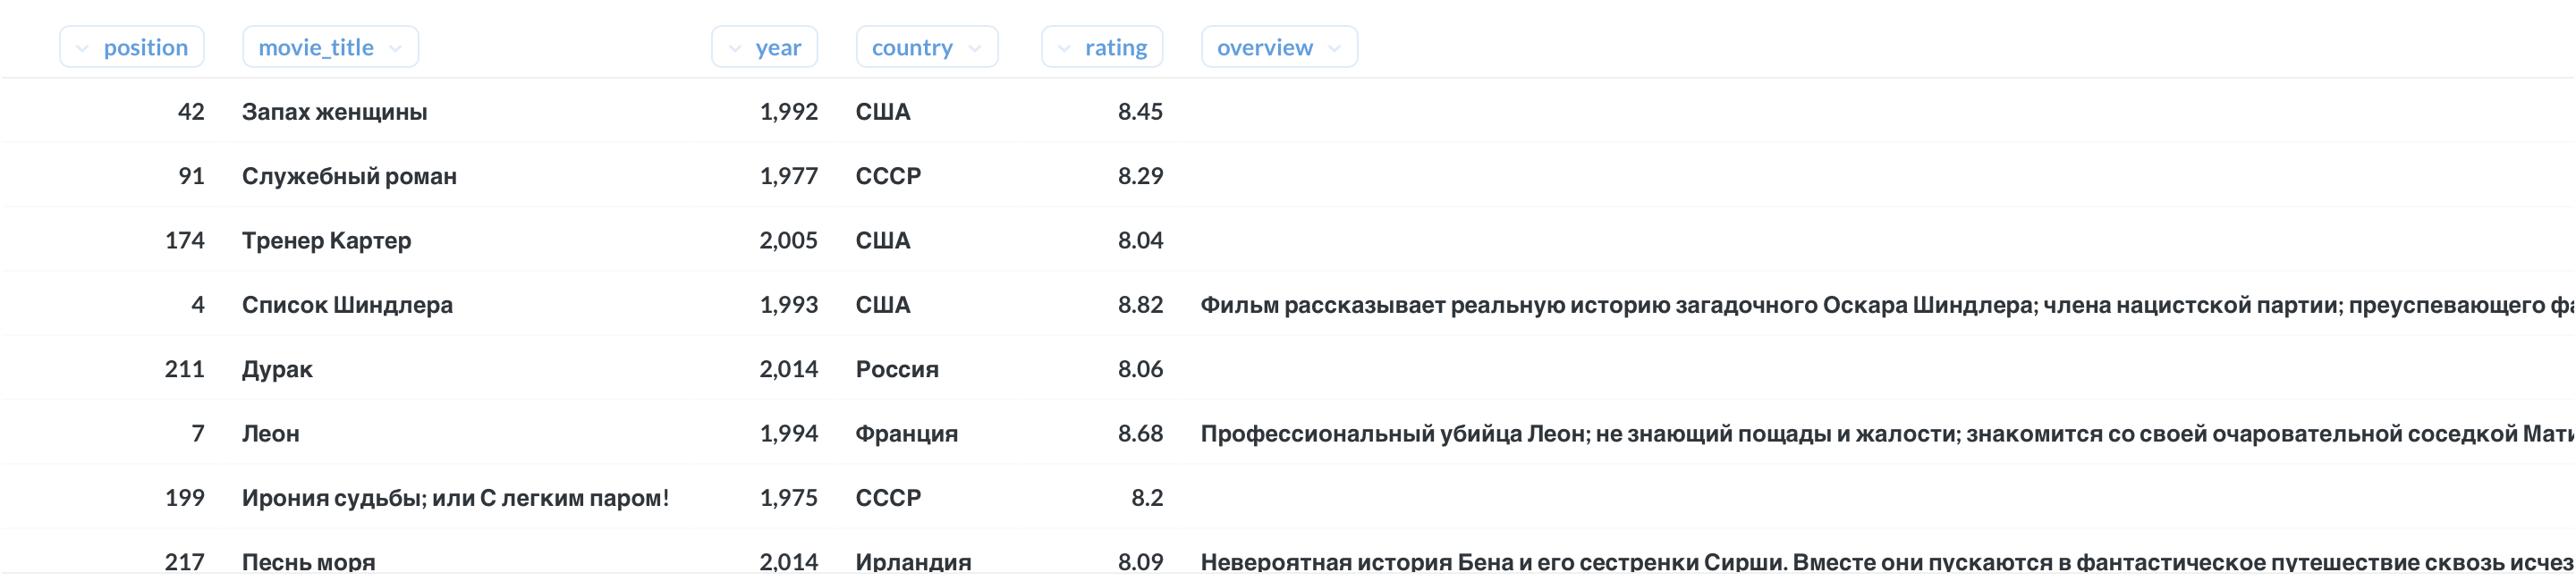

Для пустых значений есть специальное обозначение — NULL.

При этом вы не можете просто приравнять значение к NULL. Проверим это на следующем запросе:

SELECT * /*выбор всех полей*/

FROM sql.kinopoisk /*из таблицы sql.kinopoisk*/

WHERE overview = NULL /*если у фильма отсутствует описание*/

Вывод будет пустым

А теперь попробуйте изменить условие на overview IS NULL.

Если вы всё сделали верно, то получили все фильмы, у которых в таблице отсутствует описание.

Вы можете добавить к условию уже изученное ключевое слово NOT, чтобы получилось overview IS NOT NULL, тогда в выводе вы увидите только фильмы с заполненным описанием.

>Важно! NULL — это специальное значение. Если вы фильтруете столбец, в котором есть пустые значения, по любому условию, кроме IS NULL / IS NOT NULL, такие значения будут исключены из вывода.

SELECT * /*выбор всех полей*/

FROM sql.kinopoisk /*из таблицы sql.kinopoisk*/

WHERE overview is NULL /*если у фильма отсутствует описание*/
***

# Сортировка

### ORDER BY

Чтобы задать порядок вывода строк в запросе, применим новое ключевое слово ORDER BY.

Для примера отсортируем фильмы по их названию в алфавитном порядке.

SELECT *

FROM sql.kinopoisk

ORDER BY movie_title

Напишите запрос, который выведет из таблицы kinopoisk все столбцы и отсортируйте строки по возрастанию рейтинга фильма.

SELECT *

FROM sql.kinopoisk

ORDER BY rating

Как видите, сортировка по возрастанию проводится по умолчанию.

Наш запрос с сортировкой по названию аналогичен такому:

SELECT *

FROM sql.kinopoisk

ORDER BY rating ASC

Здесь ASC — явное указание порядка сортировки по возрастанию (англ. ascending).

Для обратного порядка используется ключевое слово DESC (англ. descending).

Разумеется, мы можем комбинировать в нашем запросе фильтрацию строк и сортировку вывода, а также выводить только необходимые столбцы.

Выведем названия, имена режиссёров и сценаристов, а также год выхода в прокат фильмов, выпущенных в СССР, и отсортируем результат по убыванию рейтинга.

SELECT /*выбор*/
    movie_title, /*столбец movie_title*/
    director, /*столбец director*/
    screenwriter, /*столбец screenwriter*/
    year /*столбец year*/

FROM sql.kinopoisk /*из таблицы sql.kinopoisk*/

WHERE country = 'СССР' /*при условии, что страна производства — СССР*/

ORDER BY rating DESC /*сортировка по рейтингу в порядке убывания*/

>Обратите внимание! Ключевое слово ORDER BY идёт после применения всех условий в WHERE.

Напишите запрос, который выведет столбцы с названием фильма, его описанием и годом выхода в прокат. Оставьте только те фильмы, у которых рейтинг не ниже 8.2 и страна производства — не США. Отсортируйте вывод по году выхода фильма в порядке убывания.


SELECT /*выбор*/
    movie_title, /*столбец movie_title*/
    overview, /*столбец director*/
    year /*столбец screenwriter*/
    
FROM sql.kinopoisk /*из таблицы sql.kinopoisk*/

WHERE rating >= 8.2 AND  country <> 'США' /*при условии, что страна производства — СССР*/

ORDER BY year DESC /*сортировка по рейтингу в порядке убывания*/

Также в ORDER BY можно указывать, где должны идти пустые значения — в начале или в конце.

Такая настройка порядка вывода задаётся с помощью ключевых слов NULLS FIRST / NULLS LAST.

SELECT  /*выбор*/
    movie_title,  /*столбец movie_table*/
    rating,  /*столбец rating*/
    overview,  /*столбец overview*/
    year /*столбец year*/

FROM sql.kinopoisk  /*из таблицы sql.kinopoisk*/

ORDER BY overview /*сортировка по столбцу overview*/

А теперь измените последнюю строку скрипта на ORDER BY overview NULLS FIRST.

Такой запрос выведет первыми строки с пустым описанием.

>Вы можете сортировать вывод по нескольким столбцам, просто указав их через запятую в ORDER BY (порядок сортировки указывается отдельно для каждого столбца).

Кроме того, вы можете сортировать результат запроса и по тем столбцам, которых нет в выводе.
***

Получили список всех режиссёров и фильмов из ТОП-250, отсортированных по году выхода в прокат, а внутри года — по рейтингу в порядке убывания.

SELECT /*выбор*/
    director, /*столбец director*/
    movie_title /*столбец movie_title*/
    
FROM sql.kinopoisk /*из таблицы sql.kinopoisk*/

ORDER BY year, rating DESC /*сортировка по столбцам year и rating в порядке убывания*/
***
Напишите запрос, чтобы вывести названия всех фильмов (столбец Название фильма), у которых рейтинг выше 8.3 и страна производства — Франция. Отсортируйте по рейтингу в порядке убывания, далее — по году выхода в прокат (также в порядке убывания).

SELECT /*выбор*/
    movie_title /*столбец movie_title*/

FROM sql.kinopoisk /*из таблицы sql.kinopoisk*/

where rating > 8.3 and country = 'Франция'

ORDER BY rating, year DESC /*сортировка по столбцам year и rating в порядке убывания*/
***
Для упрощения работы с ORDER BY можно использовать не названия столбцов, а их номера из вывода.

SELECT /*выбор*/
    director, /*столбец director*/
    movie_title, /*столбец movie_title*/
    year /*столбец year*/

FROM sql.kinopoisk /*из таблицы sql.kinopoisk*/

ORDER BY 1, 3 DESC /*сортировка по первому и третьему столбцам*/
***

# Ограничение вывода

LIMIT

По умолчанию при любом запросе вы получаете в выводе все строки, попадающие под условия запроса.

Чаще всего именно этого вы и ожидаете, но иногда, например, вам нужно просто взглянуть на содержание таблицы, при этом чем она больше, тем дольше будет работать запрос.

Ограничим вывод первыми десятью строками и сможем легко понять, какие данные хранятся в таблице, не утяжеляя результат.

SELECT * /*выбор всех полей*/

FROM sql.kinopoisk /*из таблицы sql.kinopoisk*/

LIMIT 10 /*ограничить вывод десятью значениями*/

***

Выведем ТОП-5 фильмов по рейтингу, сначала отсортировав их по убыванию, а потом оставив только верхние пять строк с помощью LIMIT.

SELECT /*выбор*/
    movie_title, /*столбец movie_title*/
    rating /*столбец rating*/

FROM sql.kinopoisk /*из таблицы sql.kinopoisk*/

ORDER BY rating DESC /*сортировка по столбцу rating в порядке убывания*/

LIMIT 5 /*ограничить пятью значениями*/
***

>Обратите внимание! Ключевое слово LIMIT используется в самом конце запроса.

***

Напишите запрос, который выводит информацию (Режиссёр, Название фильма и Актёры) по ТОП-20 самых старых (определяем по году выхода в прокат) фильмов из таблицы kinopoisk.

Выведите столбцы Режиссёр, Название фильма, Актёры.

SELECT director, movie_title, actors /*выбор всех полей*/

FROM sql.kinopoisk /*из таблицы sql.kinopoisk*/

ORDER BY year 

LIMIT 20 /*ограничить вывод десятью значениями*/

### OFFSET

Если LIMIT «оставляет» указанное число первых строк из вывода, то OFFSET, наоборот, «обрезает» указанное число первых строк.

>LIMIT и OFFSET можно использовать вместе, их порядок не важен.

Выведем название и рейтинг фильмов с четвёртого по восьмое место.

SELECT /*выбор*/
    movie_title, /*столбец movie_title*/
    rating /*столбец rating*/

FROM sql.kinopoisk /*из таблицы sql.kinopoisk*/

ORDER BY rating DESC /*сортировка по столбцу rating в порядке убывания*/

OFFSET 3 LIMIT 5 /*исключить первые три строки и вывести пять следующих за ними*/

Таким образом, LIMIT отсчитывает количество строк после указанной в OFFSET строки.
***

Напишите запрос, чтобы вывести названия фильмов, которые вышли в прокат после 1990 года и были сняты не в России. Из этого списка оставьте только те фильмы, которые занимают с 20 по 47 места в рейтинге. Отсортируйте результат по убыванию рейтинга фильмов.

SELECT /*выбор*/
    movie_title /*столбец movie_title*/
    
FROM sql.kinopoisk /*из таблицы sql.kinopoisk*/

WHERE year > 1990 AND country <> 'Россия'

ORDER BY rating DESC

OFFSET 19 LIMIT 28 /*исключить первые три строки и вывести пять следующих за ними*/

***
В этом модуле вы отлично потрудились:

- познакомились с первыми операторами и ключевыми словами;
- научились выводить только необходимые столбцы, а также задавать базовые условия для фильтрации строк;
- произвели первые арифметические операции с данными;
- научились сортировать и ограничивать полученные данные.

Напоследок напомним структуру простого запроса:

SELECT
    столбец1 AS новое_название,
    столбец2,    столбец3

FROM таблица

WHERE (условие1 OR условие2)    AND условие3

ORDER BY сортировка1, сортировка2

OFFSET 1 LIMIT 2

***
Напишите запрос, который выводит столбцы «Название фильма» (movie_title), «Режиссёр» (director), «Сценарист» (screenwriter), «Актёры» (actors). Оставьте только те фильмы, у которых:

рейтинг между 8 и 8.5 (включительно) ИЛИ год выхода в прокат до 1990;
есть описание;
название начинается не с буквы 'Т';
название состоит ровно из 12 символов.
Оставьте только топ-7 фильмов, отсортированных по рейтингу.

SELECT
    movie_title "Название фильма",
    director "Режиссёр",
    screenwriter "Сценарист",
    actors "Актёры"

FROM sql.kinopoisk

WHERE (rating BETWEEN 8 AND 8.5 OR year < 1990)
    AND overview IS NOT NULL
    AND movie_title NOT LIKE 'T%'
    AND movie_title LIKE '____________'

ORDER BY rating DESC

LIMIT 7